# Problem Statement | Cloud Counselage live project
## TECHNOLOGY: DATA SCIENCE

Students from different cities from the state of Maharashtra had applied for the Cloud
Counselage Internship Program. We have the dataset of consisting information of all the
students. Using this data we want to get more insights and draw out more meaningful
conclusions. Interns are expected to build a data visualization model and find the best data
segmentation model using the student’s dataset. Following are the tasks interns need to
perform :
#### 1. Interns need to preprocess the data for missing values, unknown values, encoding categorical values.

#### 2. Create a data visualization model to build graphs from the dataset answering the following questions:

    a. The number of students applied to different technologies.
    b. The number of students applied for Data Science who knew ‘’Python” and who didn’t.
    c. The different ways students learned about this program.
    d. Students who are in the fourth year and have a CGPA greater than 8.0.
    e. Students who applied for Digital Marketing with verbal and written communication score greater than 8.
    f. Year-wise and area of study wise classification of students.
    g. City and college wise classification of students.
    h. Plot the relationship between the CGPA and the target variable.
    i. Plot the relationship between the Area of Interest and the target variable.
    j. Plot the relationship between the year of study, major, and the target variable.

#### 3. Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use( 'ggplot')
plt.rcParams.update({'font.size': 15})

In [2]:
df  = pd.read_csv('D:\CC Live Project\cc-live-project\DS_DATASET.csv')
pd.set_option('display.max_columns', None)

df.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,Emergency Contact Number,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,CGPA/ percentage,Expected Graduation-year,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,7828240738,DY Patil College of Engineering And Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,Second-year,7.26,2022,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,2891397791,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,B.Tech,Electronics and Telecommunication,Full-time,Fourth-year,8.73,2020,Cloud Computing,Student,Yes,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,9388905869,Vidyalankar Institute of Technology,Mumbai University,B.E.,Electrical Engineering,Full-time,Fourth-year,8.61,2020,IoT,Student,Yes,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,8037797161,Brahmdevdada Mane Institute of Technology,Punyashlok Ahilyadevi Holkar Solapur University,B.Tech,Computer Engineering,Full-time,Second-year,7.96,2022,Digital Marketing,Student,No,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,1328949359,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,First-year,7.07,2023,Cloud Computing,Student,No,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [3]:
df.describe()


,Zip Code,Age,Contact Number,Emergency Contact Number,CGPA/ percentage,Expected Graduation-year,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,0.0,10000.000000,10000.000000,0.0,0.0
mean,410087.514700,21.384700,5.521004e+09,5.569675e+09,8.500260,2021.509300,NaN,7.988400,7.995500,NaN,NaN
std,6408.897346,1.489674,2.622215e+09,2.581596e+09,0.860161,1.116888,NaN,1.413529,1.419113,NaN,NaN
min,400012.000000,19.000000,6.402026e+06,1.001359e+09,7.000000,2020.000000,NaN,6.000000,6.000000,NaN,NaN
25%,400701.000000,20.000000,3.191651e+09,3.353914e+09,7.750000,2021.000000,NaN,7.000000,7.000000,NaN,NaN
50%,413001.000000,21.000000,5.543699e+09,5.634072e+09,8.500000,2022.000000,NaN,8.000000,8.000000,NaN,NaN
75%,416004.000000,23.000000,7.796677e+09,7.794617e+09,9.232500,2023.000000,NaN,9.000000,9.000000,NaN,NaN
max,416436.000000,24.000000,9.999767e+09,9.999852e+09,10.000000,2023.000000,NaN,10.000000,10.000000,NaN,NaN


In [4]:
df.shape,df.columns

((10000, 32),
 Index(['First Name', 'Last Name', 'City', 'State', 'Zip Code',
        'DOB [DD/MM/YYYY]', 'Age', 'Gender', 'Email Address', 'Contact Number',
        'Emergency Contact Number', 'College name', 'University Name', 'Degree',
        'Major/Area of Study', 'Course Type', 'Which-year are you studying in?',
        'CGPA/ percentage', 'Expected Graduation-year', 'Areas of interest',
        'Current Employment Status', 'Have you worked core Java',
        'Programming Language Known other than Java (one major)',
        'Have you worked on MySQL or Oracle database',
        'Have you studied OOP Concepts',
        'Certifications/Achievement/ Research papers',
        'Rate your written communication skills [1-10]',
        'Rate your verbal communication skills [1-10]',
        'Link to updated Resume (Google/ One Drive link preferred)',
        'link to Linkedin profile', 'How Did You Hear About This Internship?',
        'Label'],
       dtype='object'))

In [5]:
df['City'].unique()

array(['Kolhapur', 'Pune', 'Mumbai', 'Solapur', 'Sangli', 'NaviMumbai'],
      dtype=object)

In [6]:
df =  df.rename(columns = {'First Name' : 'First_name', 'Last Name' :'Last_Name' , 'Zip Code' :'Zip_Code' ,
        'DOB [DD/MM/YYYY]' : 'DOB', 'Email Address': 'Email', 'Contact Number' : 'Contact',
        'Emergency Contact Number' : 'Emergency', 'College name' : 'College', 'University Name' : 'University',
        'Major/Area of Study' : 'Major', 'Course Type' : 'Course_type', 'Which-year are you studying in?' : 'Year' ,
        'CGPA/ percentage' : 'cgpa', 'Expected Graduation-year' :'Graduation', 'Areas of interest' : 'Technology',
        'Current Employment Status' : 'career', 
        'Programming Language Known other than Java (one major)' : 'Language',
        'Have you worked on MySQL or Oracle database' : 'Database_proficiency',
        'Have you studied OOP Concepts' : 'OOP_concepts',
        'Certifications/Achievement/ Research papers': 'certifications',
        'Link to updated Resume (Google/ One Drive link preferred)' : 'resume',
        'link to Linkedin profile' : 'linkedin'})








## a. The number of students applied to different technologies.

In [7]:
technology_counts = df.Technology.value_counts()

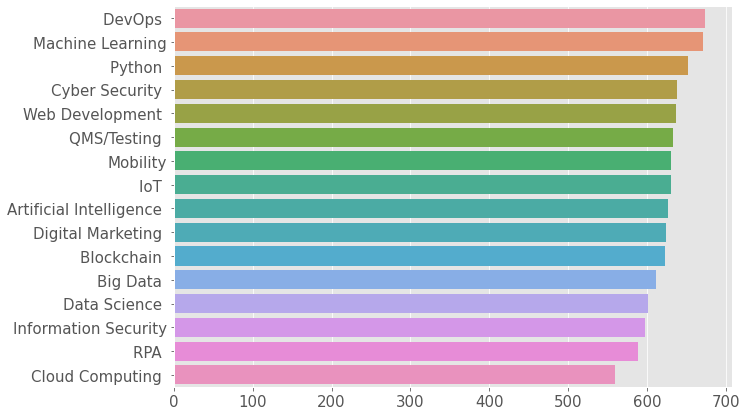

In [8]:

    plt.figure(figsize = (10,7))
    sns.barplot(y= technology_counts.index, x = technology_counts.values)


## b. The number of students applied for Data Science who knew ‘’Python” and who didn’t.

([<matplotlib.patches.Wedge at 0x1b1cae51c08>,
 [Text(-2.0703658608457975, 0.7440330652896011, 'People who know other languages'),
  Text(2.258580939104506, -0.8116724348613842, 'People Who  know python')],
 [Text(-1.1292904695522532, 0.4058362174306915, '89.02'),
  Text(1.3175055478109619, -0.4734755870024741, '10.98')])

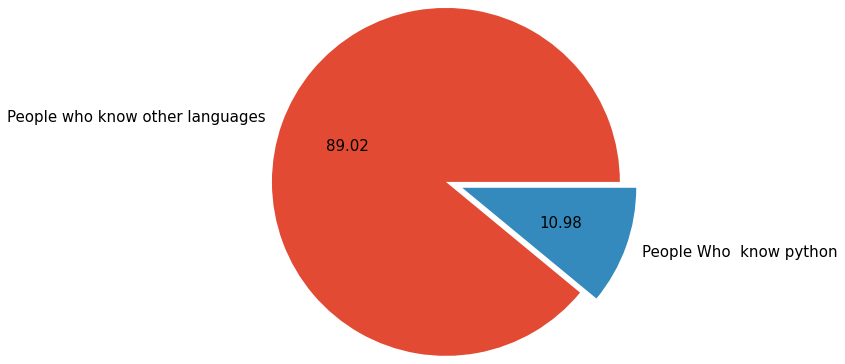

In [9]:
#plt.pie(technology_counts.values,labels = technology_counts.index)
#getting Data science entries
options=['Data Science ']
df2 = df.loc[df['Technology'].isin(options)]

#getting python and non python entries 
options=['Python']
know_python = df2.loc[df2['Language'].isin(options)]
dont_know_python = df2.loc[df2['Language'].isin(options) == False]
know_python.Language.value_counts()
dont_know_python.Language.value_counts()

not_python_sum = dont_know_python.Language.value_counts().sum()
python_sum = know_python.Language.value_counts().sum()


piechart = pd.Series([not_python_sum,python_sum], index=['People who know other languages', 'People Who  know python'])
plt.pie(piechart.values, labels = piechart.index,radius = 2,autopct='%.2f',explode=[0,0.2])

## c. The different ways students learned about this program.


In [10]:




tokens = df['How Did You Hear About This Internship?'].unique()
tokens

array(['Twitter', 'Ex/Current Employee', 'Facebook', 'Newspaper', 'Other',
       'Blog post', 'Intern', 'LinkedIn', 'Friend'], dtype=object)

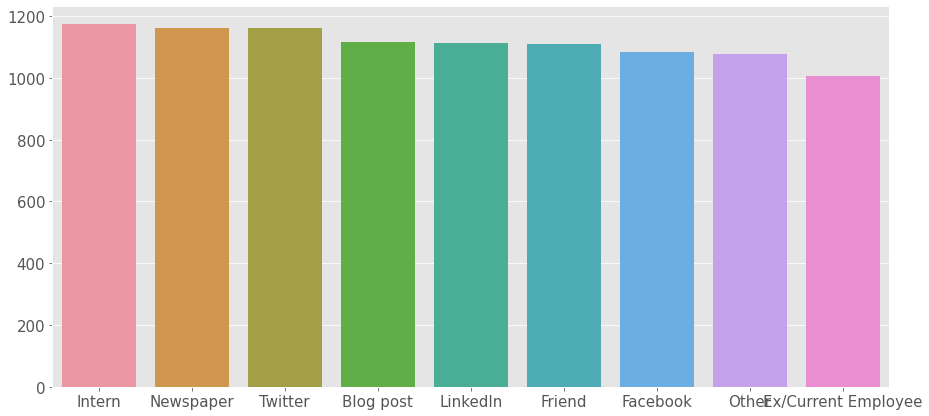

In [11]:
source_counts = df['How Did You Hear About This Internship?'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(x= source_counts.index, y = source_counts.values)

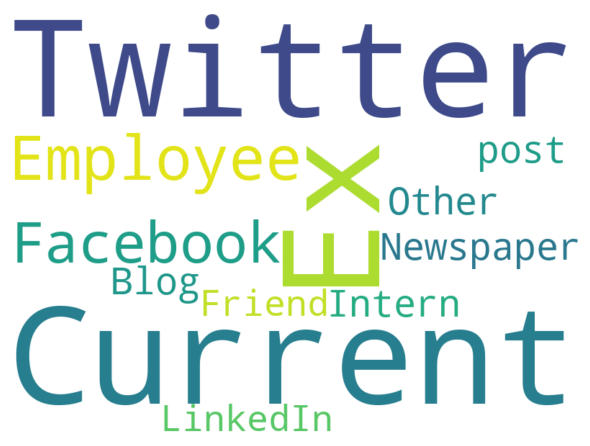

In [12]:
from  wordcloud import WordCloud , STOPWORDS

stopwords = set(STOPWORDS)
words =  " ".join(tokens)+" "

wordcloud  = WordCloud(width = 800, height = 600,background_color ='white',stopwords = stopwords, min_font_size = 10).generate(words)

plt.figure(figsize  = (8,8), facecolor = None)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## d. Students who are in the fourth year and have a CGPA greater than 8.0

In [13]:
fourth_yr = df[df['Year'] == 'Fourth-year']
cgpa_df = fourth_yr[fourth_yr['cgpa'] > 8]
cgpa_df.head()


,First_name,Last_Name,City,State,Zip_Code,DOB,Age,Gender,Email,Contact,Emergency,College,University,Degree,Major,Course_type,Year,cgpa,Graduation,Technology,career,Have you worked core Java,Language,Database_proficiency,OOP_concepts,certifications,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],resume,linkedin,How Did You Hear About This Internship?,Label
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,2891397791,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,B.Tech,Electronics and Telecommunication,Full-time,Fourth-year,8.73,2020,Cloud Computing,Student,Yes,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,9388905869,Vidyalankar Institute of Technology,Mumbai University,B.E.,Electrical Engineering,Full-time,Fourth-year,8.61,2020,IoT,Student,Yes,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12/2/2000,20,Male,fanstis5@zdnet.com,8429984749,8157591558,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,Fourth-year,9.35,2020,Python,Student,Yes,PHP,Yes,No,NaN,6,7,NaN,NaN,Twitter,ineligible
8,Stanwood,Ferron,Mumbai,Maharashtra,400055,9/12/1999,20,Male,sferron8@vkontakte.ru,8739225175,5335435027,St. Francis Institute of Technology,Mumbai University,B.E.,Computer Engineering,Full-time,Fourth-year,9.91,2020,QMS/Testing,Student,No,C++,Yes,Yes,NaN,9,10,NaN,NaN,Other,eligible
12,Adelaide,Trebilcock,Sangli,Maharashtra,416436,16/11/1998,21,Female,atrebilcockc@flickr.com,7356902004,1619171555,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Computer Engineering,Full-time,Fourth-year,8.27,2020,RPA,Student,No,PHP,Yes,No,NaN,8,6,NaN,NaN,Other,ineligible


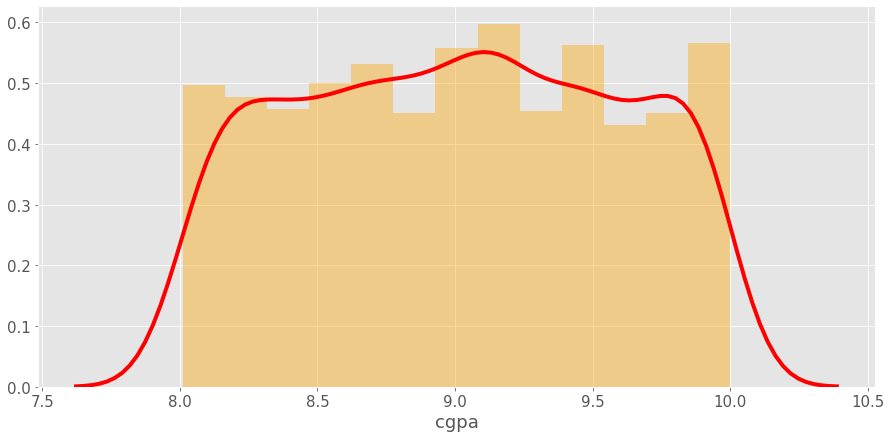

In [14]:
plt.figure(figsize = (15,7))
sns.distplot(a  =cgpa_df.cgpa,hist= True, kde_kws={"color": "red","lw" : "4"},hist_kws={"color": "orange", "label": "CGPA density"})




## e. Students who applied for Digital Marketing with verbal and written communication score greater than 8.

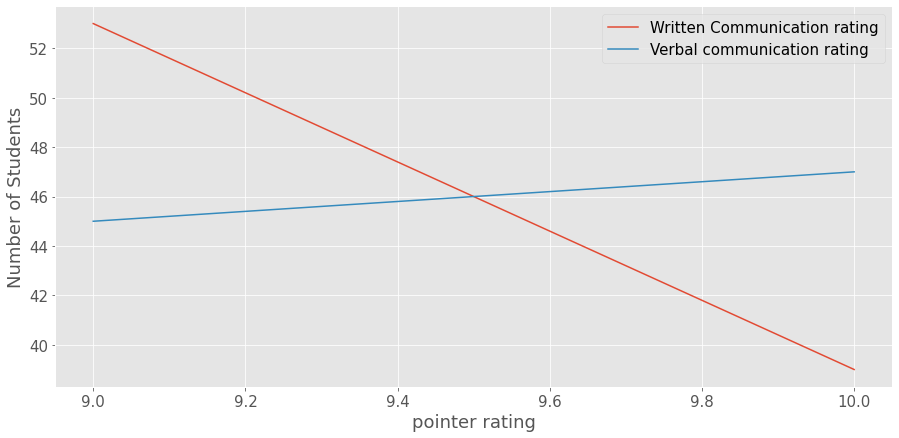

In [15]:
mrkt_df = df[df['Technology'] == 'Digital Marketing ']
score_df = mrkt_df[mrkt_df['Rate your written communication skills [1-10]'] >8]
score_df = score_df[score_df['Rate your verbal communication skills [1-10]'] >8]
#score_df.groupby(['Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]'])['career'].count().unstack().plot()




fig,ax = plt.subplots(figsize = (15,7))
ax.set_ylabel('Number of Students')
ax.set_xlabel('pointer rating')

comm_counts = score_df['Rate your written communication skills [1-10]'].value_counts()
verbal_counts = score_df['Rate your verbal communication skills [1-10]'].value_counts()
sns.lineplot(x= comm_counts.index, y = comm_counts.values,ax = ax,label = 'Written Communication rating')
sns.lineplot(x = verbal_counts.index, y = verbal_counts.values,ax =ax,label  = 'Verbal communication rating')


## f. Year-wise and area of study wise classification of students.

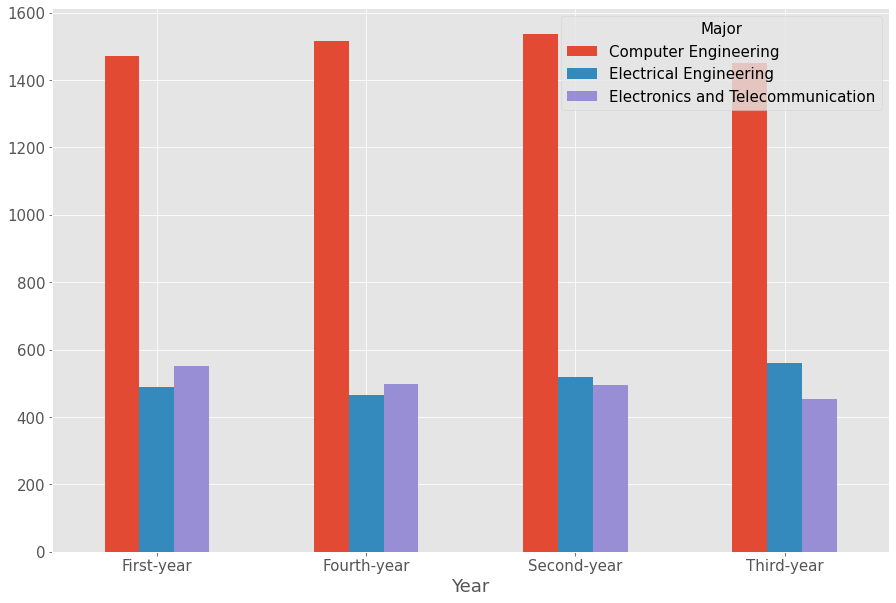

In [16]:
fig,ax = plt.subplots(figsize = (15,10) )

classify_df= df.groupby(['Year','Major']).size().unstack().plot.bar(ax =ax,rot = 0)
#classify_df

## g. City and college wise classification of students.

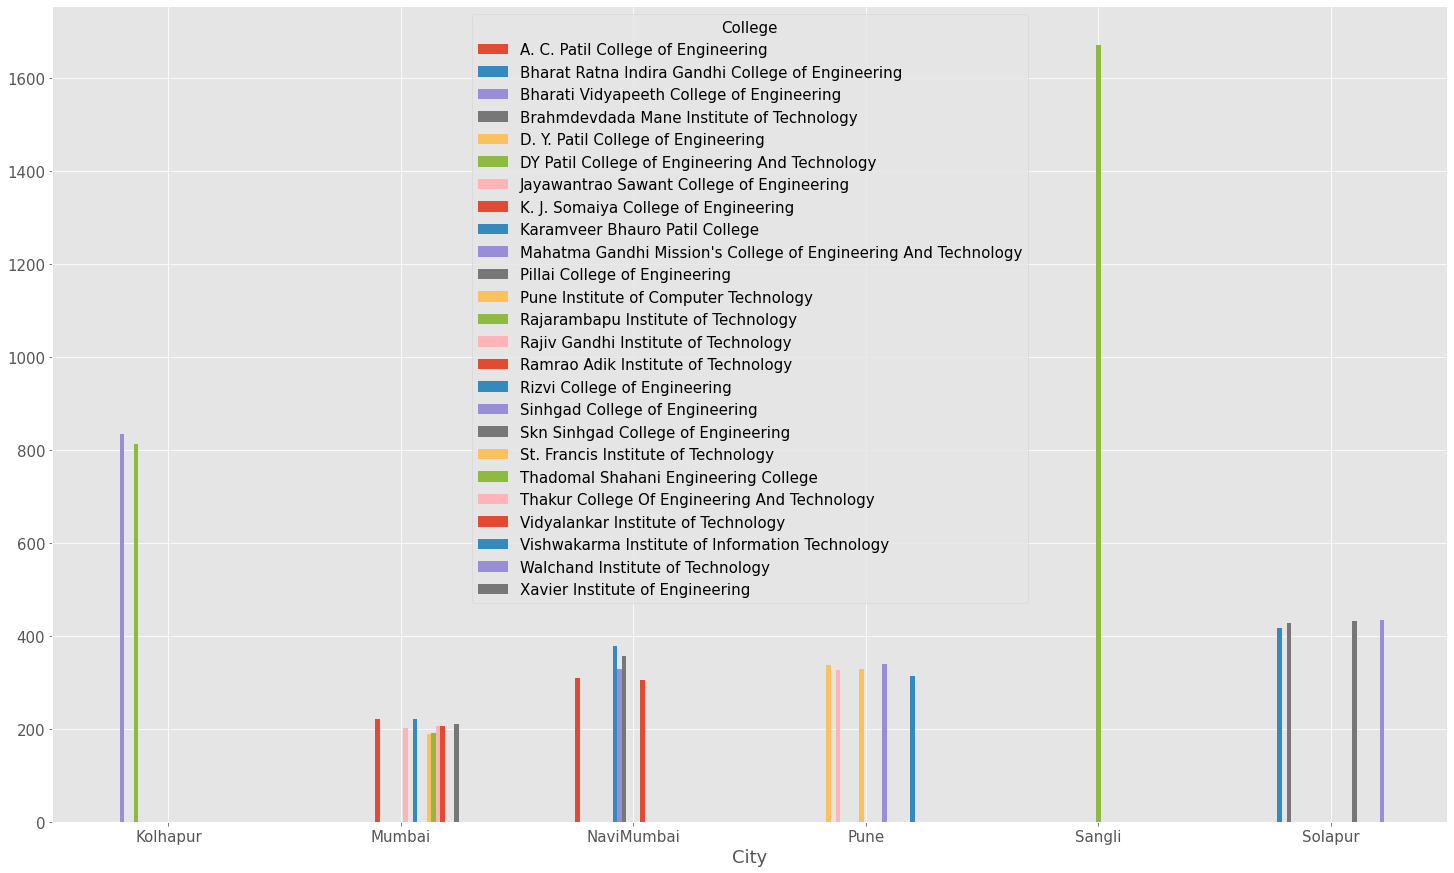

In [17]:
fig,ax = plt.subplots(figsize = (25,15) )
#college_df= df.groupby(['City','College']).size().unstack(fill_value=0).plot.bar(ax =ax,rot=0,width=1)
#college_df
pd.crosstab(df['City'],df['College']).plot.bar(ax =ax,rot = 0)



## h. Plot the relationship between the CGPA and the target variable.

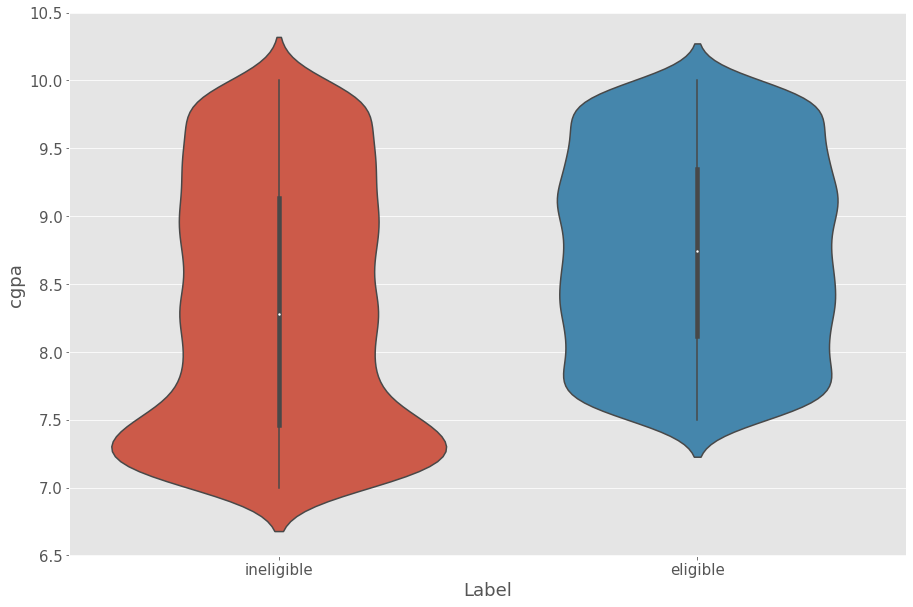

In [18]:
plt.figure(figsize = (15,10))
sns.violinplot(y="cgpa", x="Label",data=df);

## i. Plot the relationship between the Area of Interest and the target variable.

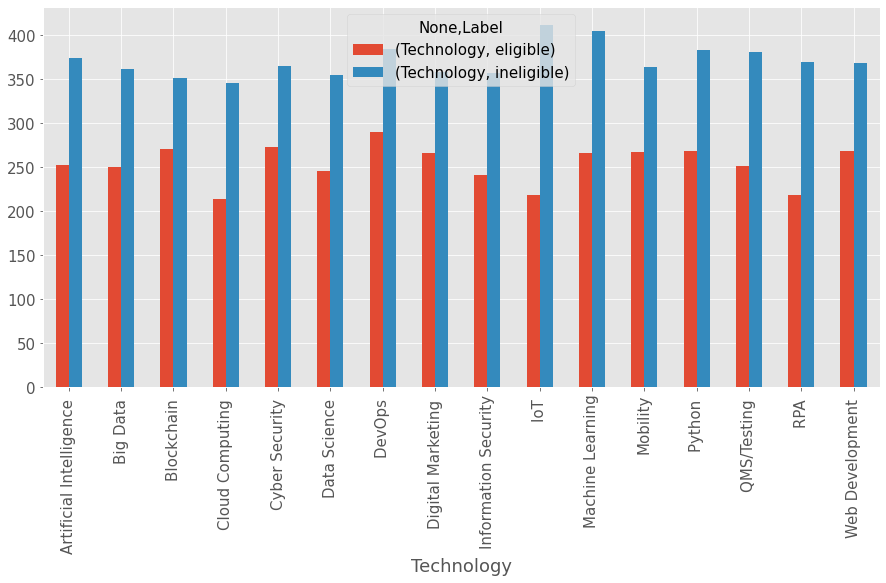

In [20]:
major_df= df.groupby(['Technology','Label'])\
['Technology'].size()[lambda x: x < 1000]

fig,ax = plt.subplots(figsize = (15,7) )
major_df = major_df.to_frame()
major_df.unstack().plot.bar(ax =ax)

## j. Plot the relationship between the year of study, major, and the target variable.

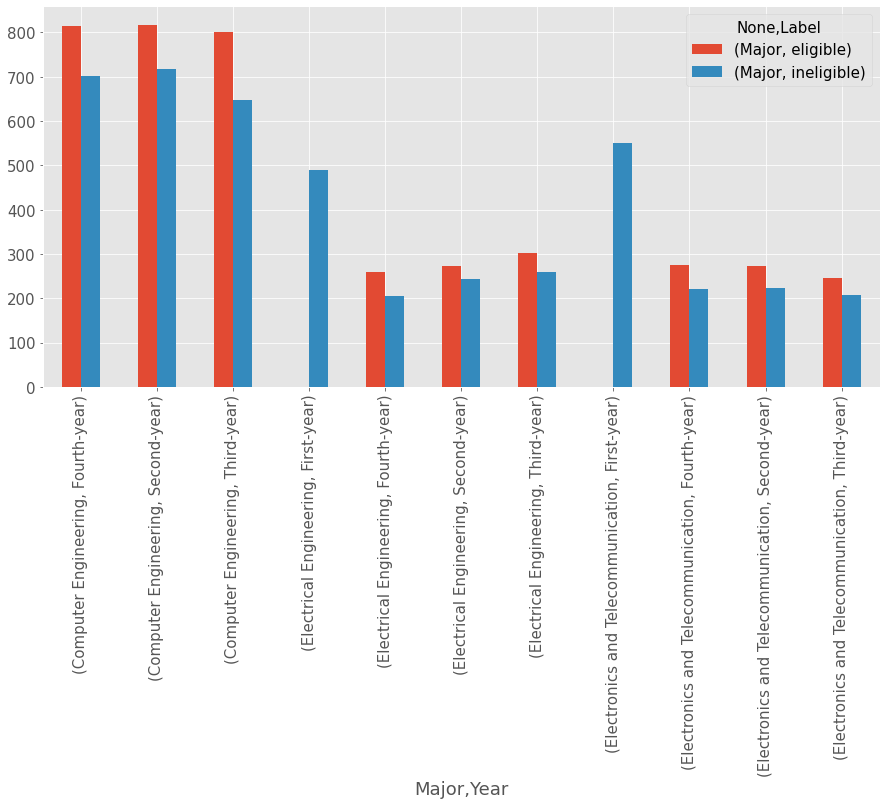

In [21]:
major_df= df.groupby(['Major','Year','Label']).Major.size()[lambda x: x < 1000]

fig,ax = plt.subplots(figsize = (15,7) )
major_df = major_df.to_frame()
major_df.unstack().plot.bar(ax =ax)
#major_df.drop('First-year')


# 3. Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”

In [22]:
df.columns

Index(['First_name', 'Last_Name', 'City', 'State', 'Zip_Code', 'DOB', 'Age',
       'Gender', 'Email', 'Contact', 'Emergency', 'College', 'University',
       'Degree', 'Major', 'Course_type', 'Year', 'cgpa', 'Graduation',
       'Technology', 'career', 'Have you worked core Java', 'Language',
       'Database_proficiency', 'OOP_concepts', 'certifications',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]', 'resume', 'linkedin',
       'How Did You Hear About This Internship?', 'Label'],
      dtype='object')

In [23]:
df = df.drop(columns = ['First_name', 'Last_Name', 'City', 'State', 'Zip_Code', 'DOB', 'Age','Gender', 'Email', 'Contact', 'Emergency', 'College', 'University','Degree','Course_type','Graduation','certifications','resume', 'linkedin','How Did You Hear About This Internship?'])
df.columns

Index(['Major', 'Year', 'cgpa', 'Technology', 'career',
       'Have you worked core Java', 'Language', 'Database_proficiency',
       'OOP_concepts', 'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]', 'Label'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df

,Major,Year,cgpa,Technology,career,Have you worked core Java,Language,Database_proficiency,OOP_concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Label
0,1,2,26,0,0,1,4,1,0,0,4,1
1,2,1,173,3,0,1,6,0,1,4,1,0
2,1,1,161,9,0,1,1,0,0,2,0,1
3,0,2,96,7,0,0,6,0,1,3,0,1
4,1,0,7,3,0,0,7,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,3,69,10,0,1,5,1,1,3,3,0
9996,0,3,174,4,0,0,6,1,1,1,1,0
9997,2,2,152,9,0,1,3,1,0,1,1,0
9998,0,1,222,10,0,0,5,1,1,1,0,1


In [25]:
from sklearn.model_selection import train_test_split


X = df[['Major', 'Year', 'cgpa', 'Technology', 'career','Have you worked core Java', 'Language', 'Database_proficiency','OOP_concepts', 'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]']]
y = df.Label
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)
X_train

,Major,Year,cgpa,Technology,career,Have you worked core Java,Language,Database_proficiency,OOP_concepts,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10]
651,2,3,91,2,0,0,4,1,1,1,2
6560,0,0,242,5,0,0,6,1,0,0,3
8974,1,1,155,4,0,0,6,0,0,1,4
2348,0,0,151,14,0,0,6,1,1,0,2
5670,0,0,81,6,0,1,6,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...
2895,0,3,225,0,0,1,1,0,0,0,2
7813,0,2,300,2,0,1,5,0,1,1,4
905,0,2,190,3,0,1,6,1,1,0,0
5192,1,0,158,9,0,1,3,0,0,1,3


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [27]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,plot_confusion_matrix
import itertools
y_pred = rf.predict(X_test)

score = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print('accuracy  =',score, 'f1 = ', f1)

accuracy  = 1.0 f1 =  1.0


In [28]:
print(confusion_matrix(y_test,y_pred))

[[1000    0]
 [   0 1500]]


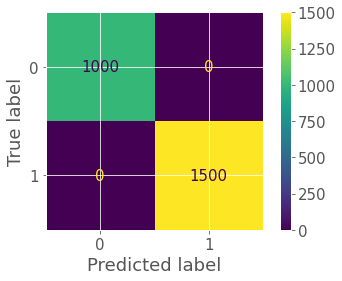

In [29]:

plot_confusion_matrix(rf, X_test,y_pred)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

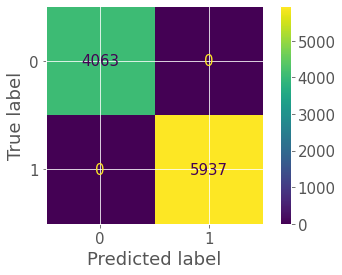

In [30]:
plot_confusion_matrix(rf,X,y)

y_all_data = rf.predict(X)

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [32]:
prediction = pac.predict(X_test)
score = accuracy_score(y_test,prediction)
f1 = f1_score(y_test,prediction)

print('accuracy  =',score, 'f1 = ', f1)

accuracy  = 0.6012 f1 =  0.7505629221916438


In [33]:
print(confusion_matrix(y_test,prediction))


[[   3  997]
 [   0 1500]]


In [34]:
from  sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [57]:
knnprediction = knn.predict(X_test)
score = accuracy_score(y_test,knnprediction)
f1 = f1_score(y_test,knnprediction)
print('accuracy  =',score, 'f1 = ', f1)

accuracy  = 0.7636 f1 =  0.7903511883646684


In [58]:
print(confusion_matrix(y_test,knnprediction))


[[ 795  205]
 [ 386 1114]]


In [60]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [61]:
svmprediction = svm.predict(X_test)
score = accuracy_score(y_test,svmprediction)
f1 = f1_score(y_test,svmprediction)
print('accuracy  =',score, 'f1 = ', f1)

accuracy  = 0.7296 f1 =  0.8135686707115278


In [62]:
print(confusion_matrix(y_test,svmprediction))

[[ 349  651]
 [  25 1475]]
